In [9]:
import os, sys
import glob
lib_path = os.path.abspath(os.path.join('..', '..', 'utils'))
sys.path.append(lib_path)
import matplotlib.pyplot as plt
from GraphType import GraphStat
import readCSV as reader
import constants

In [10]:
def getModels(folderName, numberOfModels):
    filenames = reader.readmultiplefiles(folderName, numberOfModels, False)
    graphStats = [GraphStat(filename) for filename in filenames]
    return graphStats

In [11]:
def drawTypeDistributions(folderName, numberOfModels):
    graphStats = getModels(folderName, numberOfModels)
    typeMap = {}
    keys = set()
    for g in graphStats:
        keys = keys.union(set(g.nodeTypeStat.keys()))
    for key in keys:
        typeMap[key] = [float(g.nodeTypeStat.get(key,0)) for g in graphStats]
    print(list(typeMap.keys()))
    for i, key in enumerate(typeMap.keys()):
        plt.figure(i)
        plt.hist(typeMap[key], range = (0,1), bins=50)
        plt.title(key)
        plt.plot()

['EAttribute', 'EGenericType', 'ETypeParameter', 'EPackage', 'EOperation', 'EStringToStringMapEntry', 'EEnum', 'EDataType', 'EClass', 'EReference', 'EObject', 'EEnumLiteral', 'EAnnotation', 'EParameter']


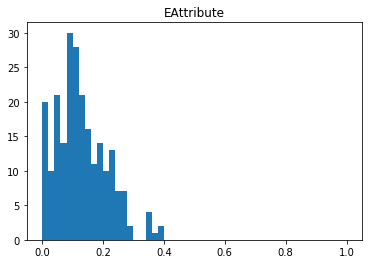

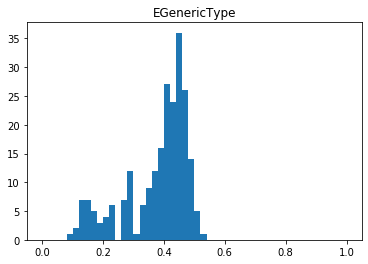

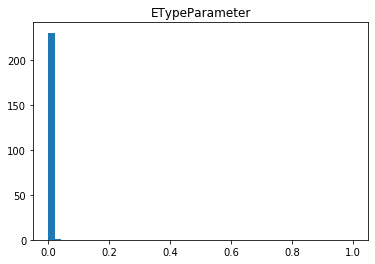

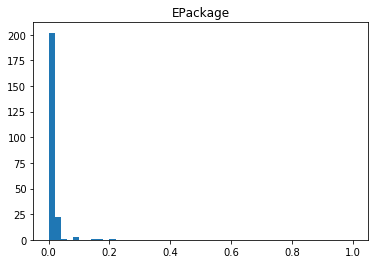

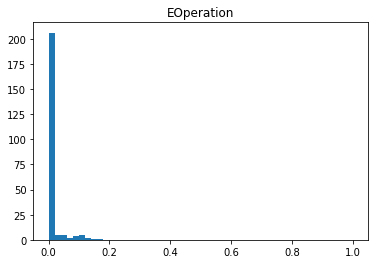

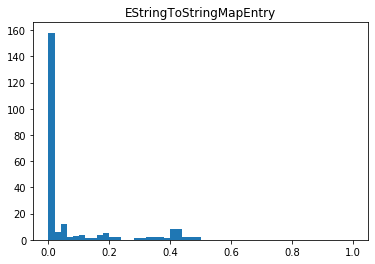

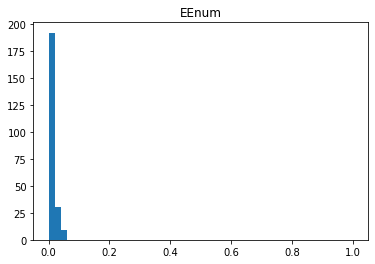

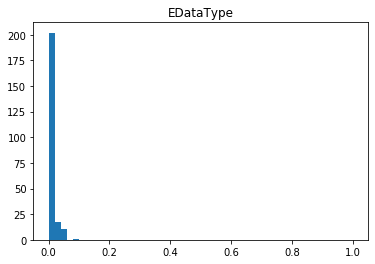

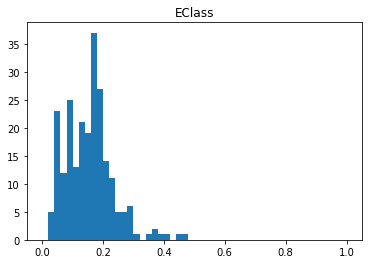

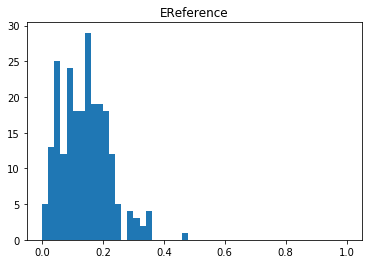

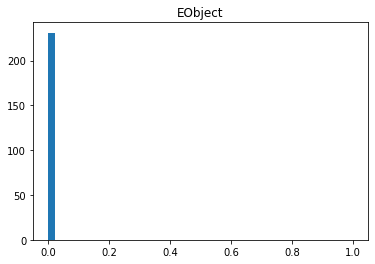

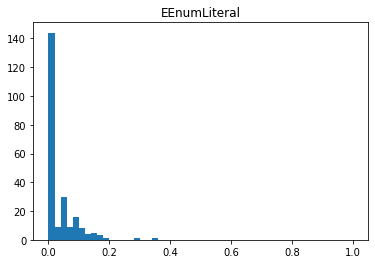

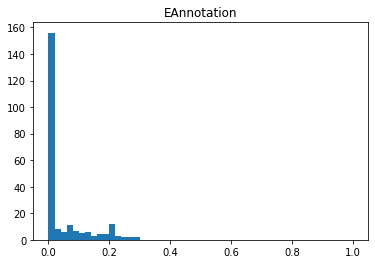

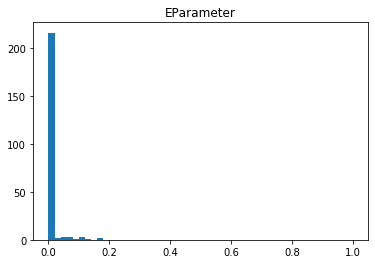

In [12]:
drawTypeDistributions('../input/human_models_75/', 1500)

['EAttribute', 'EGenericType', 'ETypeParameter', 'EPackage', 'EOperation', 'EStringToStringMapEntry', 'EEnum', 'EDataType', 'EClass', 'EReference', 'EObject', 'EEnumLiteral', 'EAnnotation', 'EParameter']


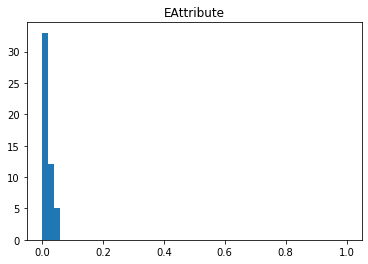

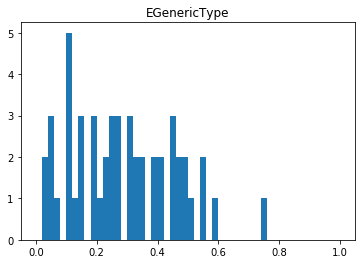

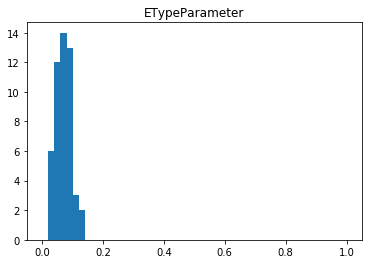

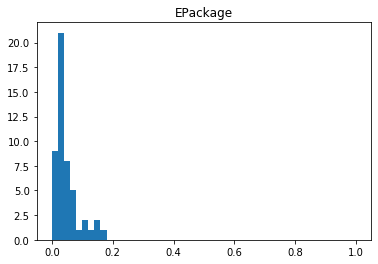

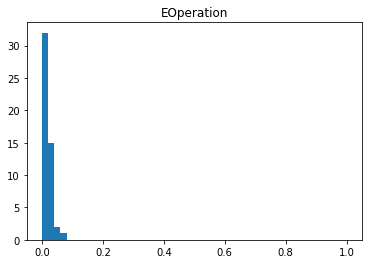

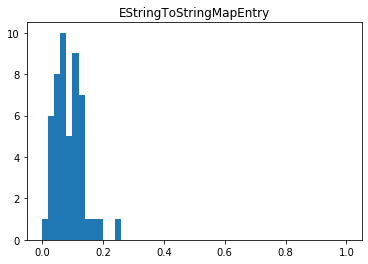

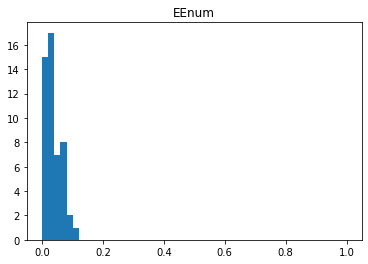

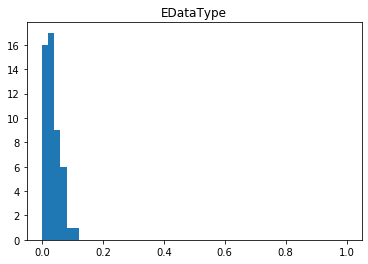

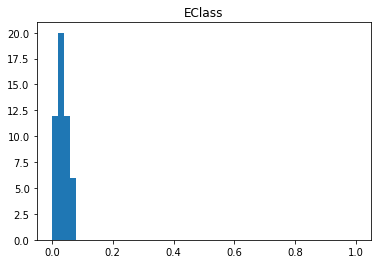

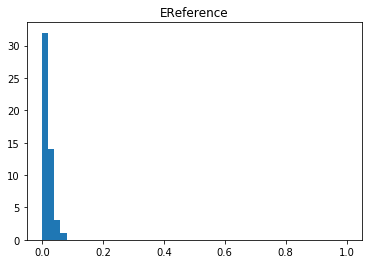

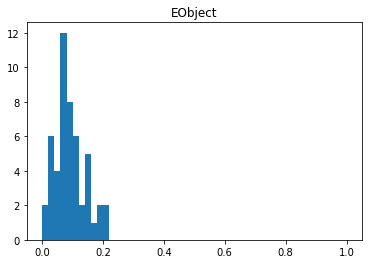

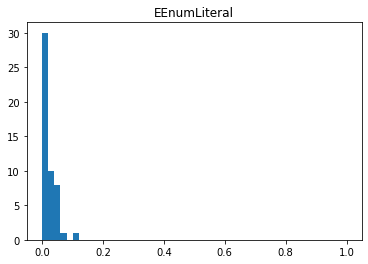

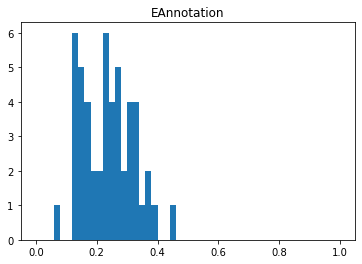

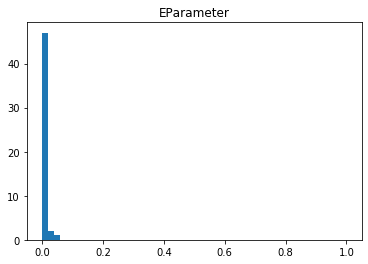

In [13]:
drawTypeDistributions('../input/viatra_75/', 50)

## Extract Human Models with size [90, 101]

In [8]:
def extractModel():
    from shutil import copy
    list_of_files = reader.readmultiplefiles('../input/humanOutput/', 5000)
    num_nodes_list =[]
    human_size_dic = {}
    for file in list_of_files:
        contents = reader.readcsvfile(file)
        num_of_node = contents[constants.NUMBER_NODES]
        # human_size_dic[file] = int(num_of_node[0])
        # num_nodes_list.append(int(num_of_node[0]))
        if 90 <= num_of_node[0] <= 110:
            copy(file, '../input/human_output_100/')

## Multinomial Distribution Analysis

In [29]:
import numpy as np
import scipy.stats as stats
graphStats = getModels('../input/human_models_75/', 1500)
totalNodes = sum(list(map(lambda g: g.numNodes, graphStats)))[0]
typeMap = {}
for g in graphStats:
    gKeys = g.nodeTypeStat.keys()
    size = g.numNodes[0]
    for key in gKeys:
        curNum = typeMap.get(key, 0)
        typeMap[key] = curNum + float(g.nodeTypeStat[key]) * size

for key in typeMap.keys():
    typeMap[key] /= totalNodes
print(typeMap)

{'EAnnotation': 0.04240463215258856, 'EClass': 0.1558242506811989, 'EAttribute': 0.12880336058128974, 'EStringToStringMapEntry': 0.07317211625794733, 'EGenericType': 0.3791439600363306, 'EReference': 0.14208673932788374, 'EPackage': 0.01759763851044505, 'EDataType': 0.005619891008174387, 'EEnumLiteral': 0.03139191643960036, 'EEnum': 0.008174386920980926, 'EOperation': 0.009366485013623978, 'EParameter': 0.00607402361489555, 'ETypeParameter': 0.00022706630336058128, 'EObject': 0.00011353315168029064}


In [30]:
def chiSquareMultinomialTest(freq, prob):
    freq = np.array(freq)
    prob = np.array(prob)
    size = sum(freq)
    e = prob * size
    return stats.chisquare(freq, e)

In [31]:
def typeDistributionTest(g):
    size = g.numNodes[0]
    freq = []
    prob = []
    for key in typeMap.keys():
        value = float(g.nodeTypeStat.get(key, 0))
        freq.append(np.round(value * size))
        prob.append(typeMap[key])
    test = chiSquareMultinomialTest(freq, prob)
    return test

In [32]:
test = [typeDistributionTest(graphStats[i]) for i in range(len(graphStats))]
print(np.mean(test, 0))
print(np.median(test, 0))

[7.26359261e+01 6.82490355e-02]
[3.31848655e+01 1.59841378e-03]


## Node Counts Distribution

In [32]:
import matplotlib.pyplot as plt
from shutil import copyfile

# graphStats = getModels('../input/human_models/', 1500)
# sizes = []
filenames = reader.readmultiplefiles('../input/human_models/', 1500, False)
count = 1
for filename in filenames:
    graphStat = GraphStat(filename)
    size = graphStat.numNodes[0]
    if(size <= 87 and size >= 67):
        copyfile(filename, '../input/human_models_75/{}.csv'.format(count))
        count+=1
        
        
        
# for g in graphStats:
# size = g.numNodes[0]
    
# print(min(sizes))
# print(len(sizes))
# plt.hist(sizes, bins=10)
